<a href="https://colab.research.google.com/github/mkaustubh/data-analytics/blob/main/IPLExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is an [IPL 2008-2019](https://github.com/mkaustubh/data-analytics) notebook. You can reference the dataset at [this link](https://www.kaggle.com/nowke9/ipldata).**
___


In [1]:
!pip install -q kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/ColabNotebooks/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets list

In [2]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 19.9MB/s]


In [3]:
!unzip ipldata.zip

Archive:  ipldata.zip
  inflating: deliveries.csv          
  inflating: matches.csv             


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
ipl_df = pd.read_csv('matches.csv')
ipl_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
ipl_df.describe

<bound method NDFrame.describe of         id  season  ...         umpire2                  umpire3
0        1    2017  ...        NJ Llong                      NaN
1        2    2017  ...          S Ravi                      NaN
2        3    2017  ...       CK Nandan                      NaN
3        4    2017  ...   C Shamshuddin                      NaN
4        5    2017  ...             NaN                      NaN
..     ...     ...  ...             ...                      ...
751  11347    2019  ...        O Nandan                   S Ravi
752  11412    2019  ...     Nitin Menon                Ian Gould
753  11413    2019  ...             NaN                      NaN
754  11414    2019  ...  Bruce Oxenford  Chettithody Shamshuddin
755  11415    2019  ...       Ian Gould              Nigel Llong

[756 rows x 18 columns]>

In [7]:
ipl_df = ipl_df.drop(columns=['umpire1','umpire2','umpire3'])
ipl_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [8]:
ipl_df.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [9]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [10]:
ipl_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [11]:
ipl_df.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

# From the Above Observations some Data cleaning is required
1. Pune was represented by various Team Names as 'Rising Pune Supergiant', 'Pune Warriors' & 'Rising Pune Supergiants' so as a convinience we will changes these with the recent team representing Pune 'Rising Pune Supergiant' in all columns involving this name i.e 'team1','team2','winner' & 'toss_winner' columns, similarly 2nd Change is in team name of Delhi
2. Earlier the team name for delhi was 'Delhi Daredevils' but later it was changed to 'Delhi Capitals' so we will replace the "delhi Daredevils' with 'Delhi Capitals'
3. Bangalore was Renamed as Bengaluru in 2014 so we will change the Name for City Bangalore to Bengaluru to avoid Errors in Data Analysis

In [12]:
# We will use the .replace() method for the above mentioned cleaning
ipl_df.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_df.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_df.toss_winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_df.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_df.city.replace({'Bangalore' : 'Bengaluru'},inplace=True)
ipl_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [13]:
ipl_df['city'][ipl_df['city'].isna()]='Dubai'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
ipl_df[ipl_df.isna().any(axis=1)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,2011,Delhi,2011-05-21,Delhi Capitals,Rising Pune Supergiant,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
545,546,2015,Bengaluru,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,2015,Bengaluru,2015-05-17,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium


From Above Results It is clear That we have have No NaN values Other than Those in Columns Of Winner and Player Of The Match

# Exploratory Analysis and Visualization

In [15]:
ipl_df.shape

(756, 15)

We can see 756 Matches Have Been Played in 11 Seasons (08 - 19)

In [16]:
ipl_df[ipl_df['result']=='normal'].shape

(743, 15)

We can See From 756 Matches Played Only 13 seem not to have a normal result

### Total Matches Played in Each City

In [17]:
#Lets See About Cities Where Matches have Been Played
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

Now Lets See Match count played in each of the above city

In [18]:
cities = ipl_df.groupby('city')[['id']].count()
cities.head()

,id
city,
Abu Dhabi,7
Ahmedabad,12
Bengaluru,80
Bloemfontein,2
Cape Town,7


In [19]:
cities = cities.rename(columns={'id':'matches'})
cities = cities.sort_values('matches',ascending=True).reset_index()
print(cities.shape)
cities.head()

(32, 2)


,city,matches
0,Bloemfontein,2
1,Nagpur,3
2,Kimberley,3
3,East London,3
4,Kanpur,4


Lets Plot the Cities in a bar Chart

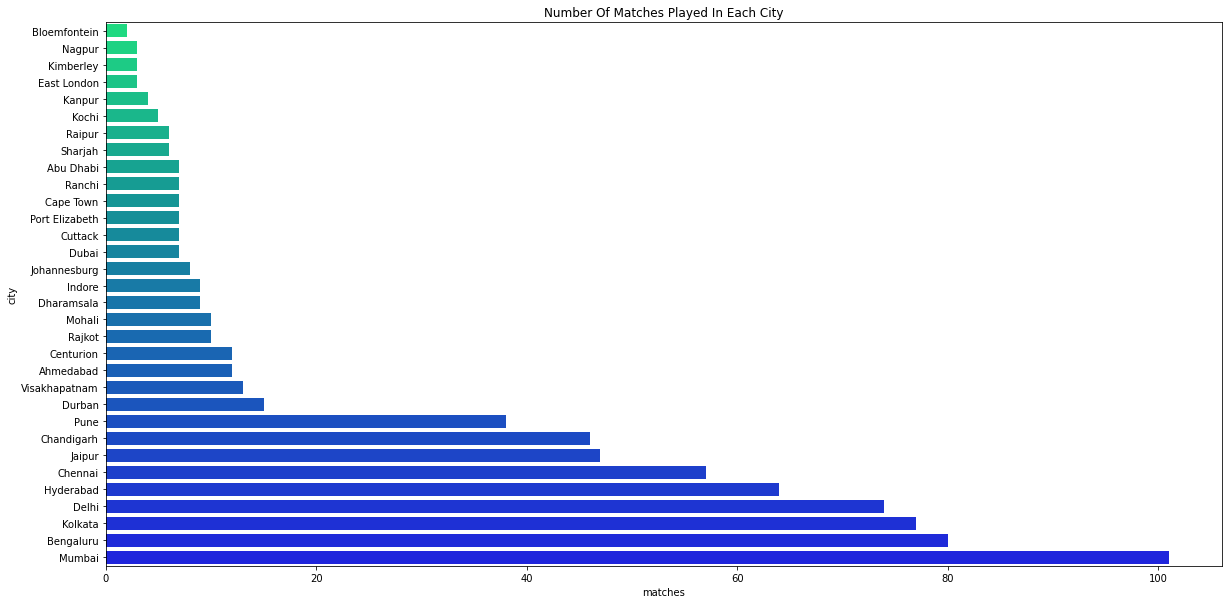

In [20]:
plt.figure(figsize=(20,10))
plt.title('Number Of Matches Played In Each City')
sns.barplot(x = 'matches', y = 'city', data = cities, palette='winter_r')

### Total Matches Won By Each Team

In [21]:
ipl_df.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', nan], dtype=object)

In [22]:
winner_df = ipl_df.groupby('winner')[['id']].count()
winner_df = winner_df.sort_values('id', ascending=False).reset_index()

winner_df.rename(columns = {'id':'wins','winner':'Teams'},inplace=True)
winner_df.head()

,Teams,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82


Seems Mumbai Indians Have won the Most matches in IPL Till Date. Followed by Chennai Super Kings.

Now Lets Plot These Wins 

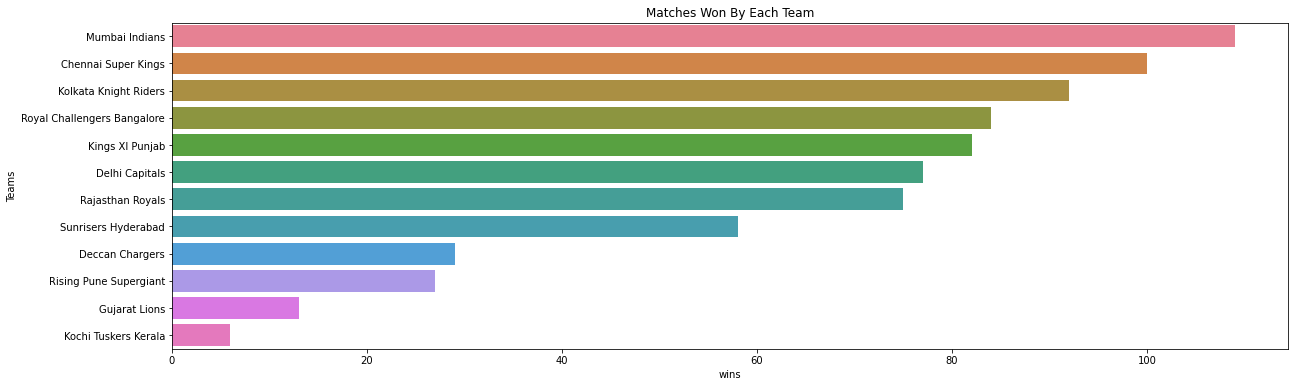

In [23]:
plt.figure(figsize=(20,6))
plt.title('Matches Won By Each Team')
sns.barplot(x = 'wins', y = 'Teams', data = winner_df, palette='husl')

Now lets See Season with Most Number Of Matches

In [24]:
season_df = ipl_df.groupby('season')[['id']].count()
season_df = season_df.sort_values('season', ascending=False).reset_index()
season_df.rename(columns = {'id':'Matches','season':'Year'},inplace = True)
season_df.head()

,Year,Matches
0,2019,60
1,2018,60
2,2017,59
3,2016,60
4,2015,59


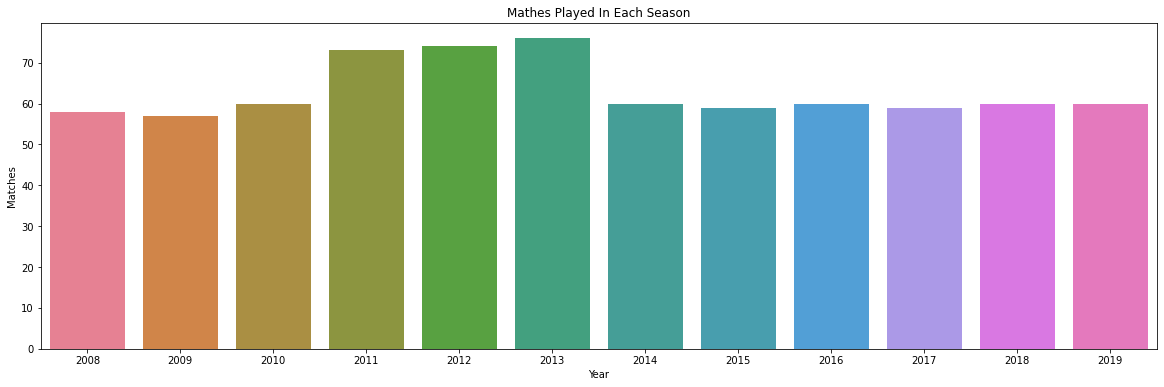

In [25]:
plt.figure(figsize=(20,6))
plt.title('Mathes Played In Each Season')
sns.barplot(x = 'Year', y = 'Matches', data = season_df, palette='husl')

# Section 3: Asking Interesting Questions on data

1. What was the most preferred Decision On winning Toss i.e. Choose To Bat / Choose To Field

2. Which Decision has proved most beneficial i.e Field / Bat 

3. Which Venue has hosted the Most Number Of Ipl Matches

4. Who has been awarded with Player Of the Max maximum Number Of Times

5. Who Has Won the Ipl Trophy Most Number of Times

6. Which Season had Most Number of Matches Played


### Q1. What was the most preferred Decision On winning Toss i.e. Bat / Field

In [26]:
ipl_df.toss_decision.unique()

array(['field', 'bat'], dtype=object)

In [27]:
decision = ipl_df.groupby('toss_decision')[['id']].count()
decision = decision.sort_values('id', ascending=True).reset_index()

decision.rename(columns={'toss_decision':'decision','id':'total'},inplace = True)
decision.head()

,decision,total
0,bat,293
1,field,463


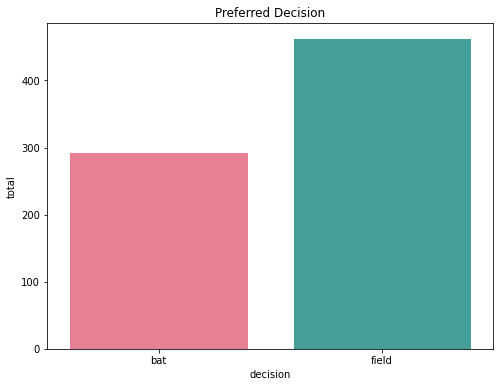

In [28]:
plt.figure(figsize=(8,6))
plt.title('Preferred Decision')

sns.set_style('whitegrid')
sns.barplot(x = 'decision', y = 'total', data = decision, palette='husl')

The Most Preferred Decision After Winning Toss in the IPL Until 2019 has been "Choose to Field First"

### Q2. Which Decision has proved most beneficial i.e Field / Bat


In [29]:
field_df = ipl_df.loc[(ipl_df['toss_winner'] == ipl_df['winner']) & (ipl_df['toss_decision'] == 'field'), ['id', 'winner','toss_decision']]

In [30]:
field_df.winner.count()

259

In [32]:
bat_df = ipl_df.loc[(ipl_df['toss_winner'] == ipl_df['winner']) & (ipl_df['toss_decision'] == 'bat'), ['id', 'winner','toss_decision']]

In [33]:
bat_df.winner.count()

134

In [34]:
frames = [bat_df, field_df]
result_df = pd.concat(frames)
result_df = result_df.groupby('toss_decision')[['id']].count()
result_df

,id
toss_decision,
bat,134
field,259


In [35]:
#As from Earlier Analysis we know out of 756 Toss that were tossed (2008 - 2019) "463 times toss winning Team Choose to Field First" and only "293 Times batting was choosen"
# Now Lets Plot the New Understanding Regarding the Success of these decisions
result_df = result_df.sort_values('id').reset_index()
result_df.rename(columns={'id':'Total','toss_decision':'Decision'},inplace=True)
result_df

,Decision,Total
0,bat,134
1,field,259


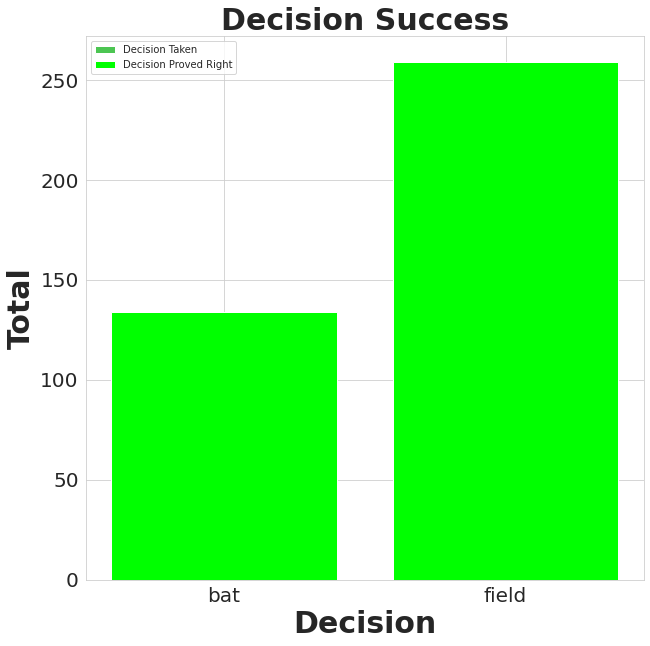

In [37]:
plt.figure(figsize=(10,10))
plt.title("Decision Success",fontweight='bold',fontsize=30)
plt.xlabel('Decision',fontweight='bold',fontsize=30)
plt.ylabel('Total',fontweight='bold',fontsize=30)
plt.tick_params(labelsize=20)
plt.bar(result_df.Decision, result_df.Total, color=['#4CC552','#4CC552']);
plt.bar(result_df.Decision, result_df.Total, color=['#00FF00','#00FF00']);
plt.legend(['Decision Taken','Decision Proved Right']);

We can See the Fielding decision on winning toss has not only been most Preferred one But it has also proven to be a good Decision as almost 60% of the Time it is Proved Right

### Q3. Which Venue has hosted the Most Number Of Matches


In [38]:
# Lets see how many venues have hosted the Ipl Matches
ipl_df.venue.unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [39]:
total_venue = list(ipl_df.venue.unique())
len(total_venue)

41

We Can See ipl has hosted the Matches across 41 Different venues 

Lets See Which Venue Hosted the Most Number Of Matches

In [40]:
venue_df = ipl_df.groupby('venue')[['id']].count()
venue_df = venue_df.sort_values('id',ascending=False).reset_index()
venue_df.rename(columns={'id':'Total','venue':'Stadium'},inplace=True)

In [41]:
labels = list(venue_df.Stadium)
venue_df

,Stadium,Total
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


As we have a long list We will only Take Top 10 Venues for our Graphical Representation



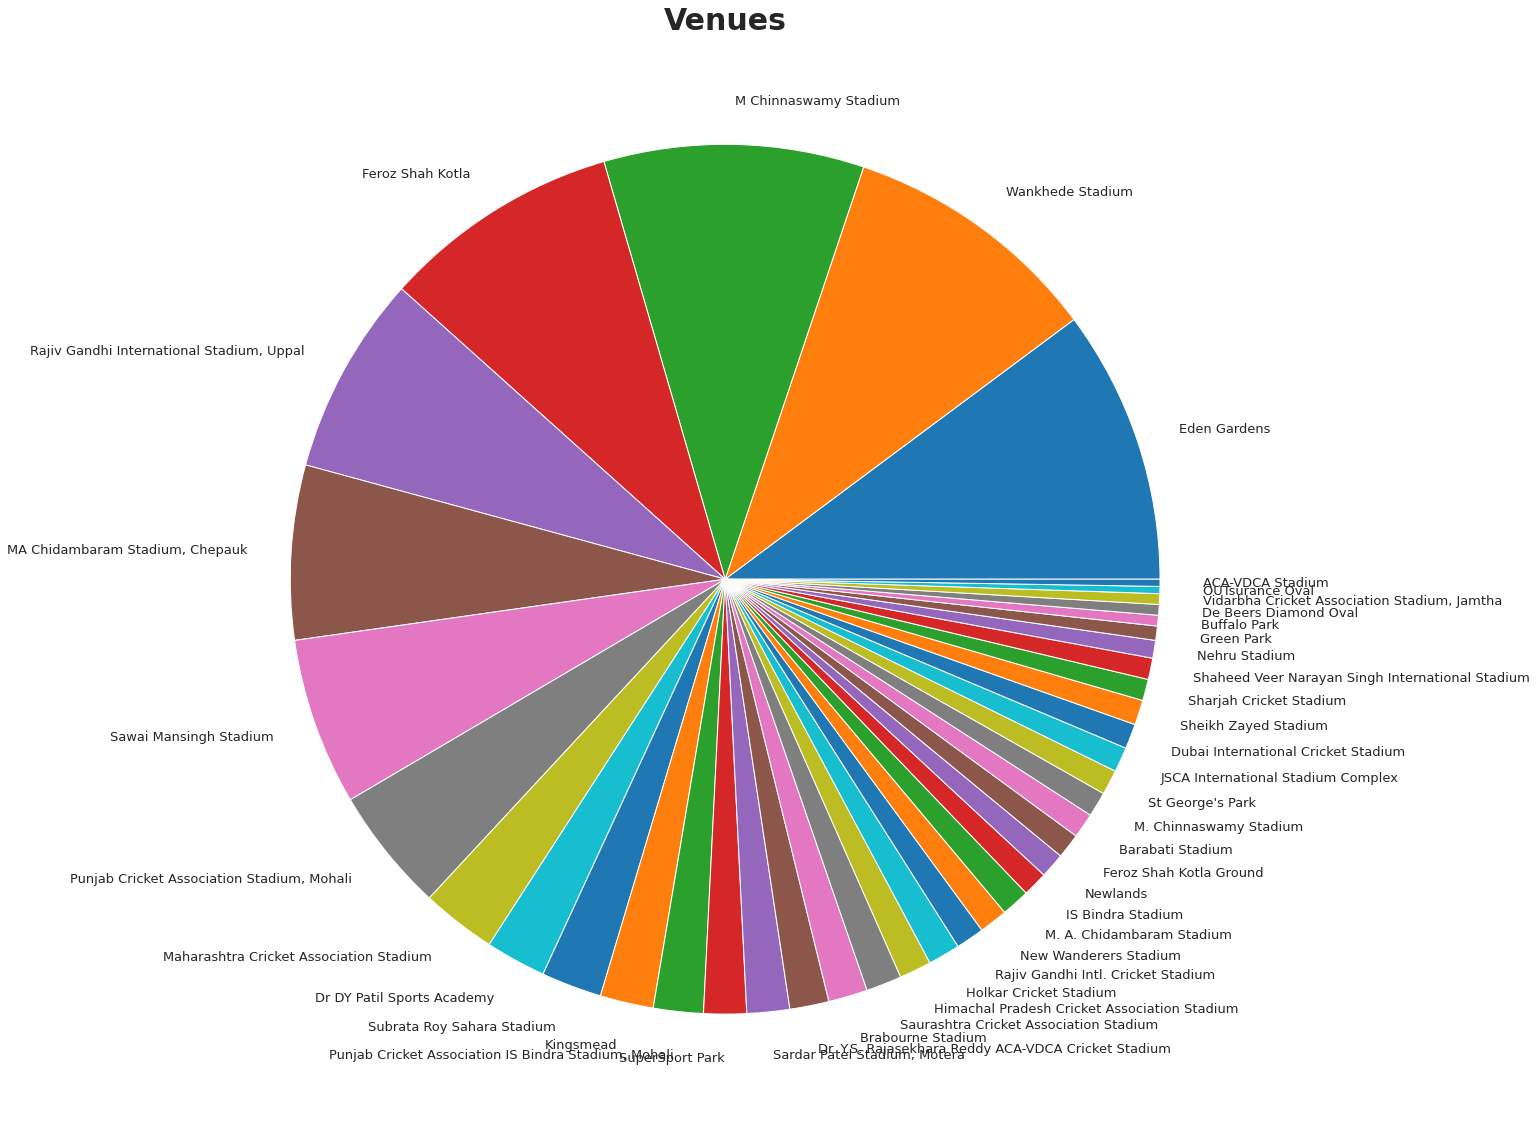

In [42]:
plt.figure(figsize=(20,20))
plt.title("Venues",fontweight='bold',fontsize=30)
plt.tick_params(labelsize=40)
plt.pie(venue_df.Total,labels=labels,textprops={'fontsize': 13});

So We can See the most Number of matches were played at Eden Gardens(77) Followed By Wankhede Stadium (73)

### Q4. Who has been awarded with Player Of the Match maximum Number Of Times

In [43]:
#Lets Check how many players have been awarded with player of the match award
len(ipl_df.player_of_match.unique())

227

This is Huge Number, we can see 227 Players have been awarded with player of the match title

Now Among these players lets see who have Got the maximum Player of The Match Awards

In [44]:
player_df = ipl_df.groupby('player_of_match')[['id']].count()

In [45]:
player_df.head()

,id
player_of_match,
A Chandila,1
A Joseph,1
A Kumble,3
A Mishra,11
A Nehra,6


In [46]:
player_df = player_df.sort_values('id',ascending=False).reset_index()

In [47]:
player_df

,player_of_match,id
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,DA Warner,17
4,RG Sharma,17
...,...,...
221,KMDN Kulasekara,1
222,KK Cooper,1
223,K Rabada,1
224,K Paul,1


In [48]:
#Now From these Players Lets Extract Top 10 Players
players_df = player_df.head(10).copy()
players_df.rename(columns={'id':'Total_Awards','player_of_match':'Man_Of_The_Match'},inplace=True)
players_df

,Man_Of_The_Match,Total_Awards
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,DA Warner,17
4,RG Sharma,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


From the above result it is clear that Chris Gayle has received  "21 Man of The Match Titles" and is followed by AB de Villiers having "20"

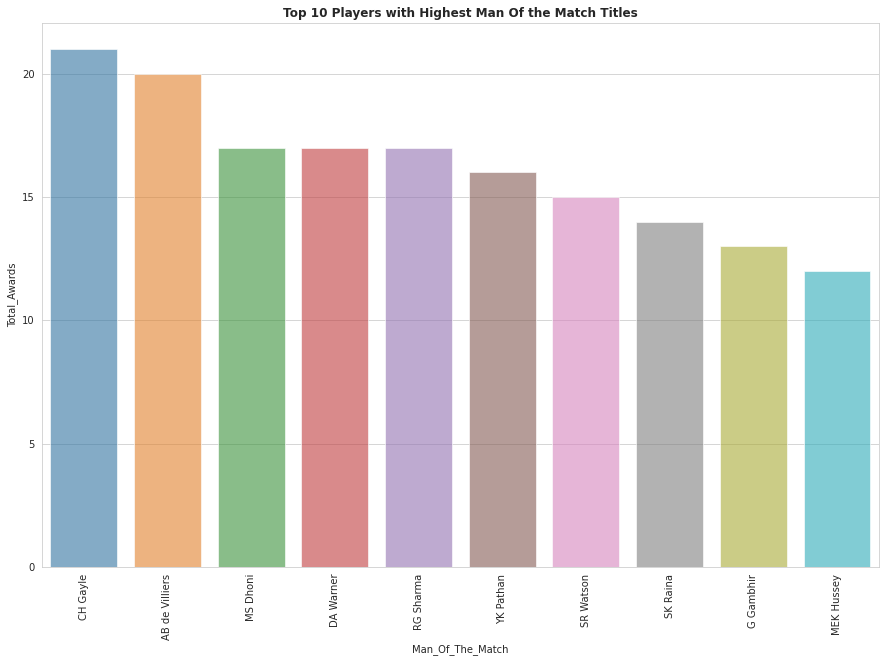

In [49]:
plt.figure(figsize=(15,10))
plt.title("Top 10 Players with Highest Man Of the Match Titles",fontweight='bold' )
plt.xticks(rotation=90)
plt.yticks(ticks=np.arange(0,25,5))
plt.ylabel('No. of Awards')
plt.xlabel('Players')
sns.barplot(x=players_df.Man_Of_The_Match,y=players_df.Total_Awards, alpha=0.6);

### Q5. Who Has Won the Ipl Trophy Most Number of Times

Now lets search For Team with Most Season Wins

We will have to extract the Final matches from the Entire Data

To do that we can sort the matches season wise and then select the last match of the season

In [52]:
final_df = ipl_df.groupby('season').tail(1).copy()

In [53]:
final_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk"


In [55]:
#Now Lets sort The Data According to Seasons
final_df = final_df.sort_values('season')
final_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk"
380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk"
456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens
516,517,2014,Bengaluru,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium
575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens
635,636,2016,Bengaluru,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"


In [56]:
final_df.winner.unique()

array(['Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Sunrisers Hyderabad'],
      dtype=object)

In [57]:
final_df['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

We can See Mumbai Indians have Won the Most Season Titles till 2019 

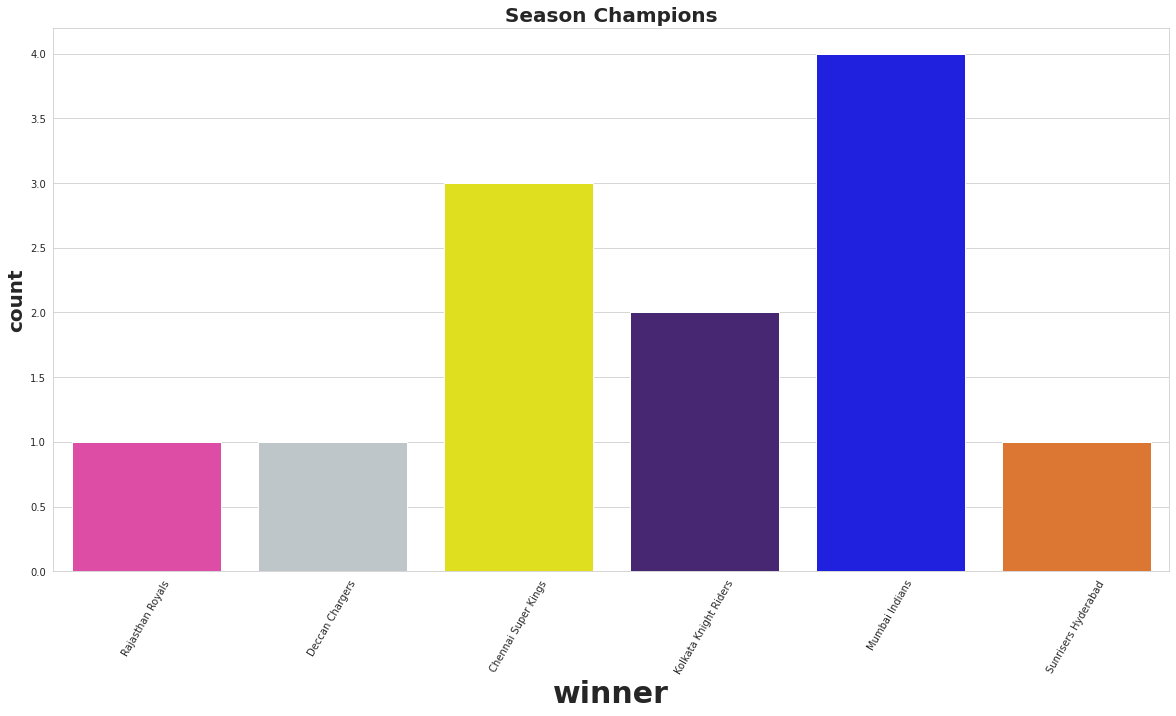

In [58]:
plt.figure(figsize=(20,10))
plt.title("Season Champions",fontweight='bold',fontsize=20)
plt.xlabel('Teams',fontweight='bold',fontsize=30)
plt.ylabel('Total Seasons',fontweight='bold',fontsize=20)
plt.xticks(rotation='60')
plt.tick_params(labelsize=10)
sns.countplot(x=final_df['winner'],palette=['#F535AA','#BCC6CC','yellow','#461B7E','blue','#F87217']);

So We can easily verify ny visuals the Most Number of Season Champion is Mumbai Indians

### Q6. Which Season Had Most Number of Matches

In [59]:
#This we had Explored Earlier
season_df.head()

,Year,Matches
0,2019,60
1,2018,60
2,2017,59
3,2016,60
4,2015,59


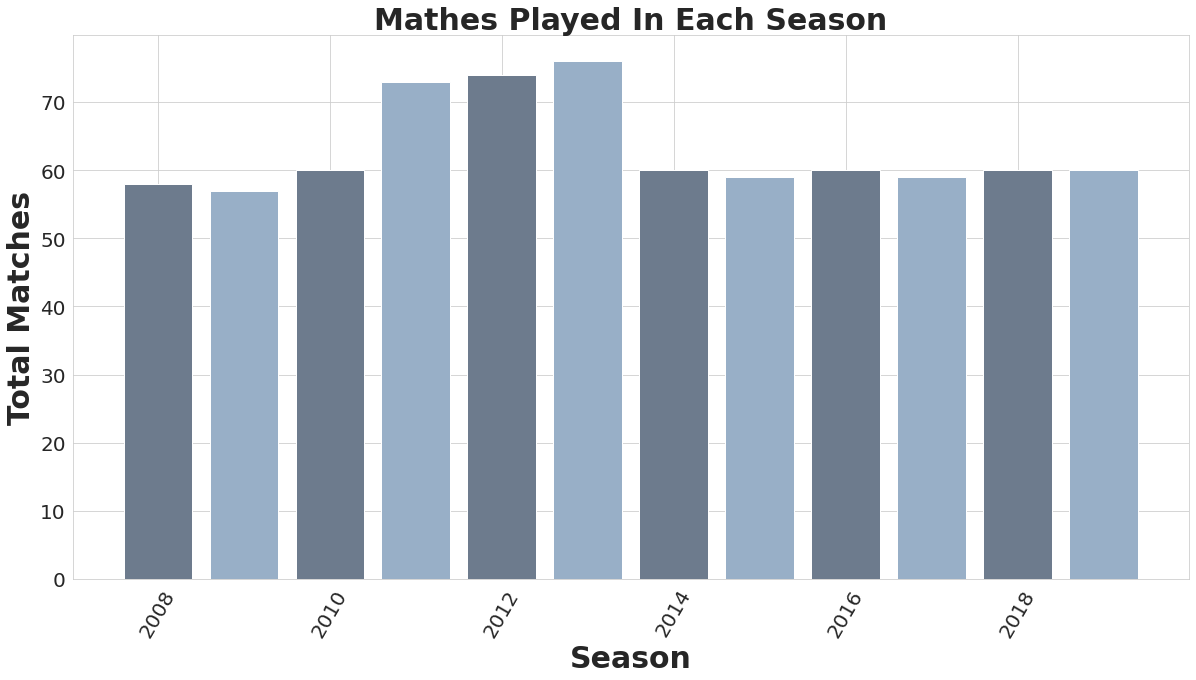

In [60]:
#To make it look more neat we will rotate the x-axis name with an angle of 60 using .xticks() method
# Also will make the font bold and increase its size for readability
plt.figure(figsize=(20,10))
plt.title("Mathes Played In Each Season",fontweight='bold',fontsize=30)
plt.xlabel('Season',fontweight='bold',fontsize=30)
plt.ylabel('Total Matches',fontweight='bold',fontsize=30)
plt.xticks(rotation='60')
plt.tick_params(labelsize=20)
plt.bar(season_df.Year,season_df.Matches,color=['#98AFC7','#6D7B8D']);

So We can see IPL-2013 had witnessed most number of matches

# Section 4: Inferences and Conclusion

In this analysis I used the matches.csv file from the kaggle Datasets. Following are my conclusions about it

1. A total of 756 matches have been played from 2008 - 2019
2. Out of these 756 matches 743 matches were played normally and had a normal result
3. Most number of Matches were played in Mumbai (101)
4. Mumbai Indian's Have Won the Most Number of Matches (109) followed by Chennai Super Kings with (100) Matches
5. IPL-2013 Season Hosted most Number of Matches (76)
6. Eden Gardens Stadium Hosted the Most Number of Matches (77) followed by Wankhede Stadium (73)
7. Chris Gayle has been the Man Of The Match Most Number of Times with (21) Awards followed by AB di Villiers (20) and MS Dhoni (17)
8. Mumbai Indians Have been the IPL Champions Most number of times (4) followed by Chennai Super Kings (3)
9. Mumbai Indians and Chennai Super Kings have been the dominant Teams